### Import Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("hepatitis_csv.csv")

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
## Check for Data types
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [5]:
df.shape

(155, 20)

### Imputation of Missing Values

In [6]:
## Check for missing values
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [7]:
## For categorical variables check the value counts
categorical_columns = ['steroid','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices']
for col in categorical_columns:
    count = df[col].value_counts()
    print("Column {0} has {1}".format(col,count))

Column steroid has True     78
False    76
Name: steroid, dtype: int64
Column fatigue has True     100
False     54
Name: fatigue, dtype: int64
Column malaise has False    93
True     61
Name: malaise, dtype: int64
Column anorexia has False    122
True      32
Name: anorexia, dtype: int64
Column liver_big has True     120
False     25
Name: liver_big, dtype: int64
Column liver_firm has False    84
True     60
Name: liver_firm, dtype: int64
Column spleen_palpable has False    120
True      30
Name: spleen_palpable, dtype: int64
Column spiders has False    99
True     51
Name: spiders, dtype: int64
Column ascites has False    130
True      20
Name: ascites, dtype: int64
Column varices has False    132
True      18
Name: varices, dtype: int64


In [8]:
## Fill the missing values with the Mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           0
liver_firm          0
spleen_palpable     0
spiders             0
ascites             0
varices             0
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [10]:
## For Numerical variables also fill the missing with mode
numerical_column = ['bilirubin','alk_phosphate','sgot','albumin']

In [11]:
df.skew()

age                0.365294
steroid           -0.039096
antivirals         1.926980
fatigue           -0.642651
malaise            0.440068
anorexia           1.464700
liver_big         -1.859869
liver_firm         0.468129
spleen_palpable    1.566545
spiders            0.734867
ascites            2.234862
varices            2.419832
bilirubin          2.891912
alk_phosphate      1.355307
sgot               3.178566
albumin           -0.121996
protime            0.022382
histology          0.196367
dtype: float64

In [12]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


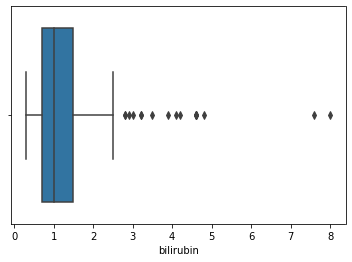

In [13]:
sns.boxplot(x= 'bilirubin', data = df)

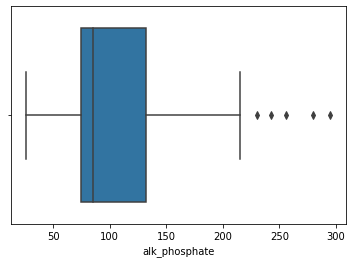

In [14]:
sns.boxplot(x= 'alk_phosphate', data = df)

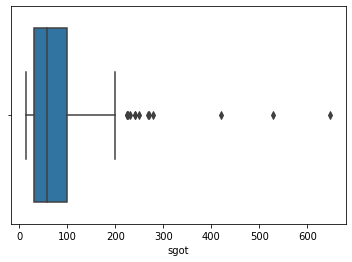

In [15]:
sns.boxplot(x= 'sgot', data = df)

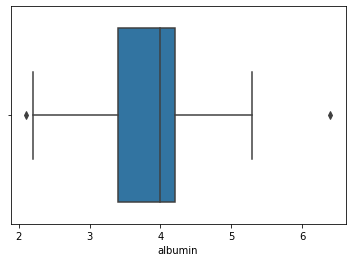

In [16]:
sns.boxplot(x= 'albumin', data = df)

In [17]:
mean1 = df['albumin'].mean()
mean = round(mean1,1)
mean

3.8

In [18]:
median1 = df['bilirubin'].median()
median1 = round(median1,1)
median1

1.0

In [19]:
median2 = df['alk_phosphate'].median()
median2 = round(median2,1)
median2

85.0

In [20]:
median3 = df['sgot'].median()
median3 = round(median3,1)
median3

58.0

In [21]:
df['albumin'] = df['albumin'].fillna(round(df['albumin'].mean(),1))
df['bilirubin'] = df['bilirubin'].fillna(round(df['bilirubin'].median(),1))
df['alk_phosphate'] = df['alk_phosphate'].fillna(round(df['alk_phosphate'].median(),1))
df['sgot'] = df['sgot'].fillna(round(df['sgot'].median(),1))

In [22]:
## Calculating percentage of missing values for variable 'protime'
count = df['protime'].isnull().sum()
count_percent = ((count/df.shape[0])*100).round()
count_percent

43.0

In [23]:
## Since the percentage of missing value is 43% we drop the variable 'protime'
df = df.drop(['protime'], axis = 1) 

In [24]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,False,live


### Exploratory Data Analysis

##### Percentage of class in the dataset

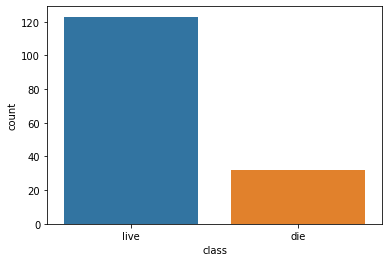

In [25]:
sns.countplot(df['class'])

In [26]:
count = df['class'].value_counts()

In [27]:
count[0]

123

In [28]:
percentage_of_live = ((count[0]/df.shape[0])*100).round()
percentage_of_die = ((count[1]/df.shape[0])*100).round()

In [29]:
print("percentage_of_live ",percentage_of_live)
print("percentage_of_die ",percentage_of_die)

percentage_of_live  79.0
percentage_of_die  21.0


##### Percentage of Sex in the Dataset

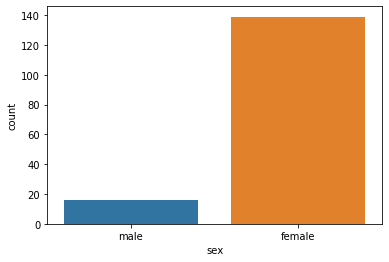

In [30]:
sns.countplot(df['sex'])

In [31]:
count_sex = df['sex'].value_counts()

In [32]:
count_sex

female    139
male       16
Name: sex, dtype: int64

In [33]:
percentage_of_female = ((count_sex[0]/df.shape[0])*100).round()
percentage_of_male = ((count_sex[1]/df.shape[0])*100).round()

In [34]:
print("percentage_of_female ",percentage_of_female)
print("percentage_of_male ",percentage_of_male)

percentage_of_female  90.0
percentage_of_male  10.0


##### Feature Engineering

In [35]:
import numpy as np

In [36]:
## Converting age into categorical variable with 4 groups
df['age']  = np.where((df['age'] <18) ,'Teenager',
             np.where((df['age'] >=18) & (df['age'] <=25),'Young',
             np.where((df['age'] >=25) & (df['age'] <=40),'Adult','Old')))

In [37]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,Adult,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,Old,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,Old,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,Adult,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,Adult,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,False,live


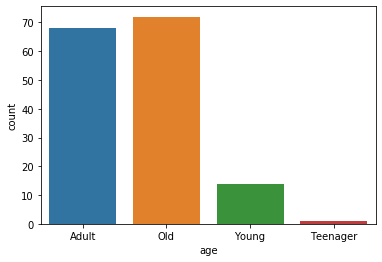

In [38]:
sns.countplot(df['age'])

###### From the above graph it's clear that dataset has more number of Adults and Old people 

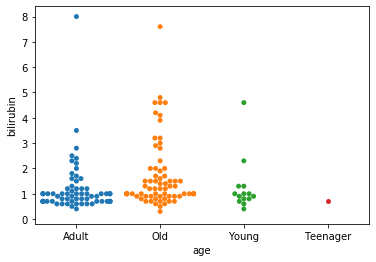

In [39]:
sns.swarmplot(x="age", y="bilirubin", data=df)


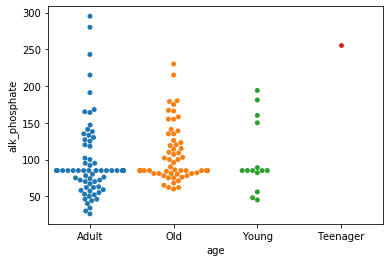

In [40]:
sns.swarmplot(x="age", y="alk_phosphate", data=df)


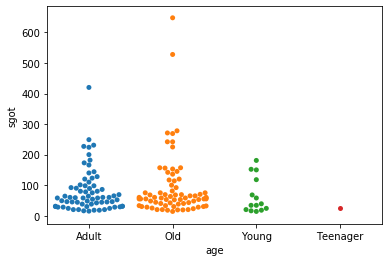

In [41]:
sns.swarmplot(x="age", y="sgot", data=df)

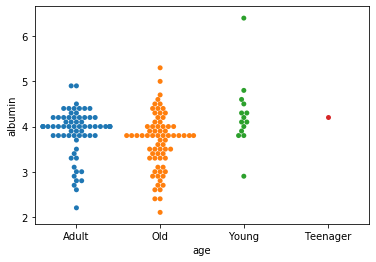

In [42]:
sns.swarmplot(x="age", y="albumin", data=df)

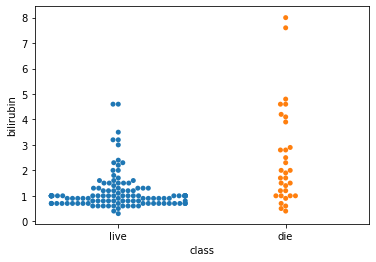

In [43]:
sns.swarmplot(x="class", y="bilirubin", data=df)

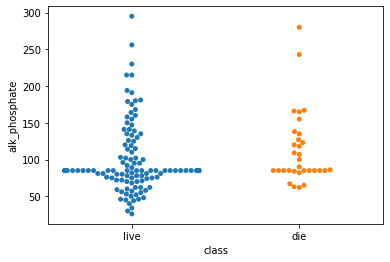

In [44]:
sns.swarmplot(x="class", y="alk_phosphate", data=df)

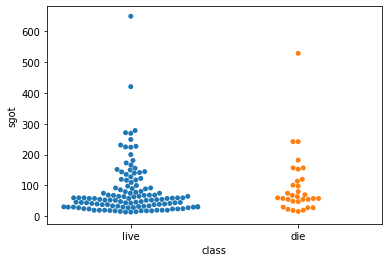

In [45]:
sns.swarmplot(x="class", y="sgot", data=df)

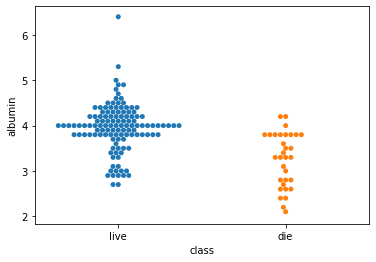

In [46]:
sns.swarmplot(x="class", y="albumin", data=df)

In [47]:
corr = df.corr()

In [48]:
import matplotlib.pyplot as plt

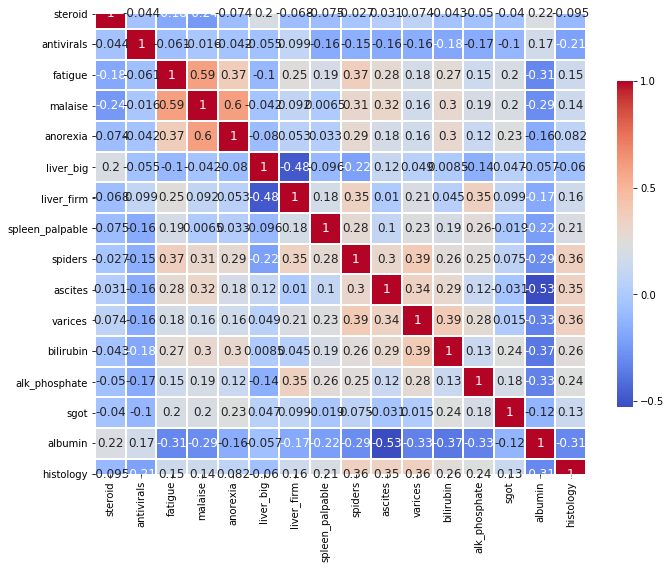

In [49]:
f,ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr,
                      square = True,
                      linewidths = 1,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

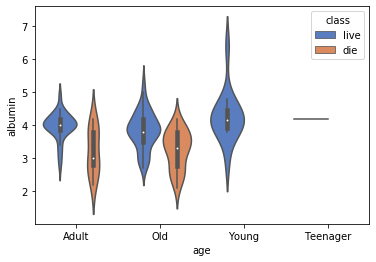

In [50]:
sns.violinplot(x="age", y="albumin", hue="class",data=df, palette="muted")

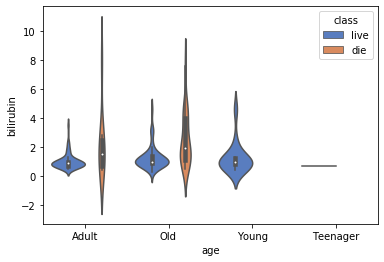

In [51]:
sns.violinplot(x="age", y="bilirubin", hue="class",data=df, palette="muted")

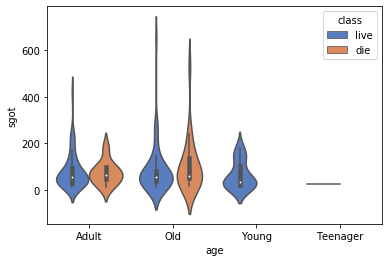

In [52]:
sns.violinplot(x="age", y="sgot", hue="class",data=df, palette="muted")

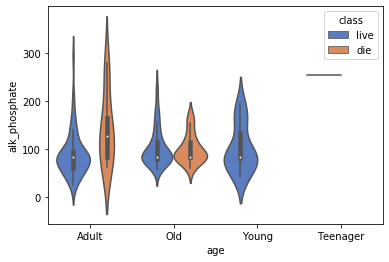

In [53]:
sns.violinplot(x="age", y="alk_phosphate", hue="class",data=df, palette="muted")